In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('bd_students_per.csv')

In [65]:
df.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


In [66]:
#there are 8612 samples and 24 attributes
df.shape

(8612, 24)

In [14]:
df.columns

Index(['id', 'full_name', 'age', 'gender', 'location', 'family_size',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'guardian', 'parental_involvement', 'internet_access', 'studytime',
       'tutoring', 'school_type', 'attendance', 'extra_curricular_activities',
       'english', 'math', 'science', 'social_science', 'art_culture',
       'stu_group'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8599 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8599 non-null   int64 
 1   full_name                    8599 non-null   object
 2   age                          8599 non-null   int64 
 3   gender                       8599 non-null   object
 4   location                     8599 non-null   object
 5   family_size                  8599 non-null   int64 
 6   mother_education             8599 non-null   object
 7   father_education             8599 non-null   object
 8   mother_job                   8599 non-null   object
 9   father_job                   8599 non-null   object
 10  guardian                     8599 non-null   object
 11  parental_involvement         8599 non-null   object
 12  internet_access              8599 non-null   object
 13  studytime                    8599 non-

Handling Missing or Null Values

In [8]:
#check for missing values
df.isnull().sum()

id                              0
full_name                       0
age                             0
gender                          0
location                        1
family_size                     0
mother_education               10
father_education                4
mother_job                      0
father_job                      0
guardian                        0
parental_involvement            0
internet_access                 0
studytime                       0
tutoring                        0
school_type                     0
attendance                      0
extra_curricular_activities     0
english                         0
math                            0
science                         0
social_science                  0
art_culture                     0
stu_group                       0
dtype: int64

In [9]:
df.loc[541]

id                                    543
full_name                      Rina Akter
age                                    19
gender                             Female
location                             City
family_size                             6
mother_education                      NaN
father_education                      SSC
mother_job                            Yes
father_job                             No
guardian                           Mother
parental_involvement                   No
internet_access                        No
studytime                               4
tutoring                               No
school_type                     Semi_Govt
attendance                             91
extra_curricular_activities           Yes
english                                62
math                                   64
science                                60
social_science                         66
art_culture                            65
stu_group                        C

In [16]:
#see the rows with missing values
df[df.isnull().any(axis=1)]

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group


In [67]:
df.dropna(inplace=True)

Handling duplicate values

In [89]:
df.duplicated().sum()

np.int64(0)

`no duplicate values`

Statistical description

In [68]:
# statistical description of the numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8599.0,4308.273636,2484.112922,2.0,2158.5,4308.0,6457.5,8613.0
age,8599.0,16.613792,0.967512,10.0,16.0,17.0,17.0,24.0
family_size,8599.0,4.500407,1.657093,0.0,3.0,5.0,6.0,11.0
studytime,8599.0,4.745901,2.187049,1.0,3.0,5.0,6.0,16.0
attendance,8599.0,74.020351,13.294836,30.0,63.0,73.0,86.0,100.0
english,8599.0,73.618677,15.349547,18.0,64.0,75.0,85.0,100.0
math,8599.0,72.946040,15.823870,33.0,64.0,73.0,84.0,100.0
science,8599.0,73.535411,15.119655,33.0,64.0,75.0,85.0,100.0
social_science,8599.0,74.478777,14.950278,36.0,65.0,77.0,86.0,100.0
art_culture,8599.0,76.250611,13.622366,36.0,69.0,76.0,86.0,100.0


From this description, we find the following:

- The student ages range from 10 to 24, with mean 16.6 and median 17
- The students' studytime range from 1 to 16 hours
- Students have attained up to 100% for all the subjects

Adding a total marks column

In [69]:
df['total_marks'] = df['english']+df['math']+df['science']+df['social_science']+df['art_culture']

In [71]:
df.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group,total_marks
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Private,95,Yes,95,98,92,94,98,Science,477
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,Semi_Govt,92,No,65,71,40,78,80,Commerce,334
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Govt,81,Yes,64,78,58,86,74,Commerce,360
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Private,90,Yes,84,90,85,86,88,Science,433
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Semi_Govt,75,Yes,54,70,45,79,76,Commerce,324


### Analyzing the Categorical Variables

Visualizing Location

In [72]:
df['location'].value_counts() # same values but some are uppercase and some are lowercase

location
City     2965
Urban    2870
Rural    2547
city      128
urban      89
Name: count, dtype: int64

Setting the values of 'City' and 'Urban' to 'city' and 'urban'

In [73]:
df['location'] = df['location'].apply(lambda x: x.lower())

In [74]:
df['location'].value_counts() #all converted to lowercase

location
city     3093
urban    2959
rural    2547
Name: count, dtype: int64

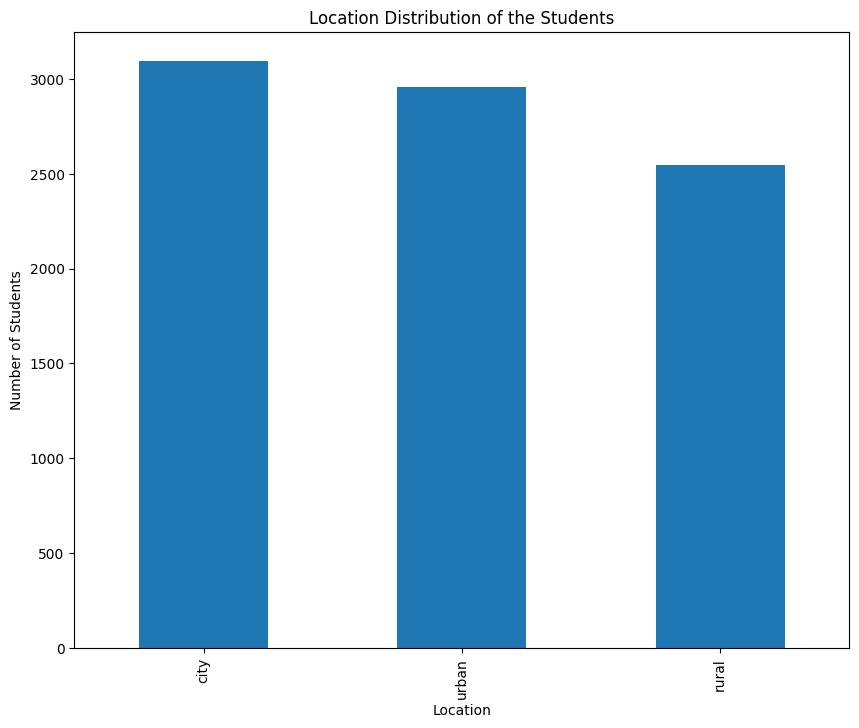

In [75]:
df['location'].value_counts().plot(kind='bar', figsize=(10, 8))
plt.title('Location Distribution of the Students')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.show()

`Insight: most students live in the city, although the distribution is almost uniform among city, urban and rural population`

Visualizing Gender

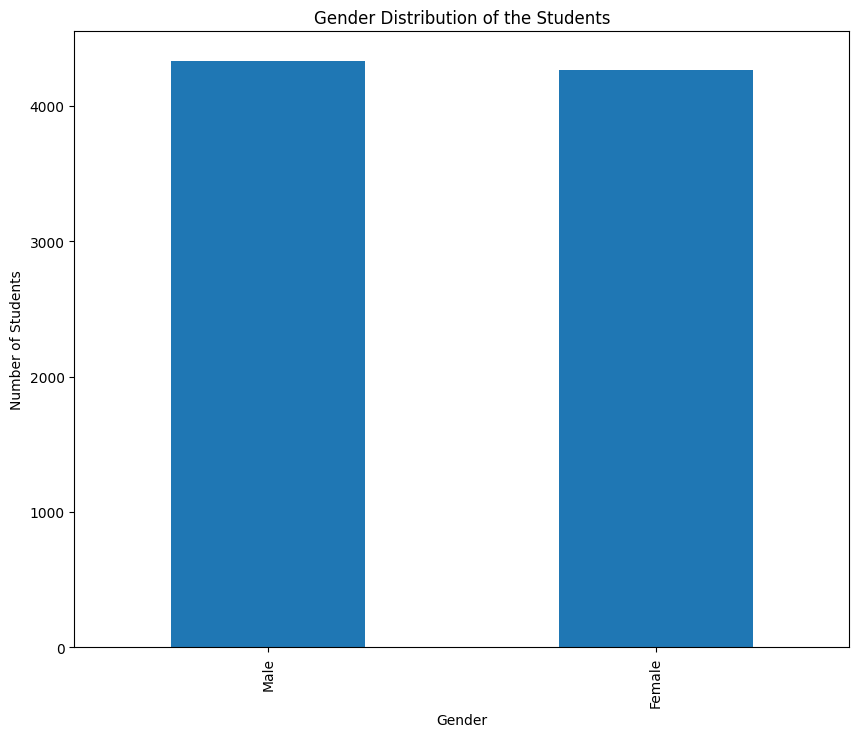

In [76]:
df['gender'].value_counts().plot(kind='bar', figsize=(10, 8))
plt.title('Gender Distribution of the Students')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

`Insight: Almost an equal distribution of male and female students`

Mother's and Fathers' Education

In [26]:
df['mother_education'].value_counts()

mother_education
SSC             1490
HSC             1369
Diploma         1297
Under_SSC       1119
Non_Educated    1070
Honors          1061
Masters         1029
Hons             164
Name: count, dtype: int64

`'Honors' and 'Hons' are the same. They should be replaced by either one`

In [78]:
df['mother_education'] = df['mother_education'].apply(lambda x: 'Honors' if x=='Hons' else x)

In [79]:
df['mother_education'].value_counts()

mother_education
SSC             1490
HSC             1369
Diploma         1297
Honors          1225
Under_SSC       1119
Non_Educated    1070
Masters         1029
Name: count, dtype: int64

In [29]:
df['father_education'].value_counts()

father_education
HSC             1345
SSC             1335
Masters         1286
Diploma         1259
Honors          1120
Non_Educated    1072
Under_SSC       1029
Hons             153
Name: count, dtype: int64

In [80]:
df['father_education'] = df['father_education'].apply(lambda x: 'Honors' if x=='Hons' else x)

In [31]:
df['father_education'].value_counts()

father_education
HSC             1345
SSC             1335
Masters         1286
Honors          1273
Diploma         1259
Non_Educated    1072
Under_SSC       1029
Name: count, dtype: int64

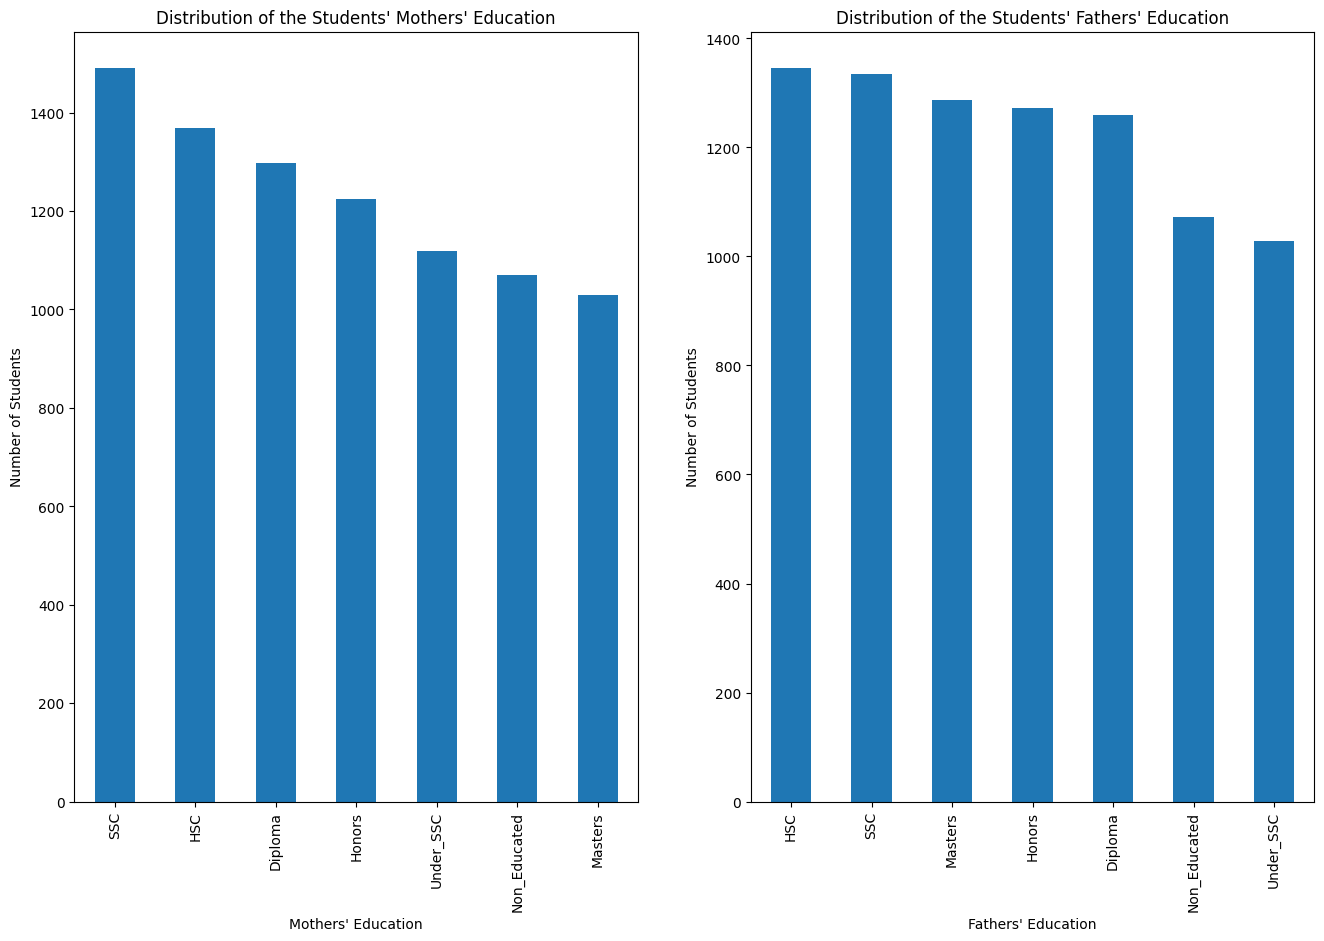

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
df['mother_education'].value_counts().plot(kind='bar')
plt.title("Distribution of the Students' Mothers' Education")
plt.xlabel("Mothers' Education")
plt.ylabel('Number of Students')

plt.subplot(1, 2, 2)
df['father_education'].value_counts().plot(kind='bar')
plt.title("Distribution of the Students' Fathers' Education")
plt.xlabel("Fathers' Education")
plt.ylabel('Number of Students')
# sns.barplot(x='')

plt.show()


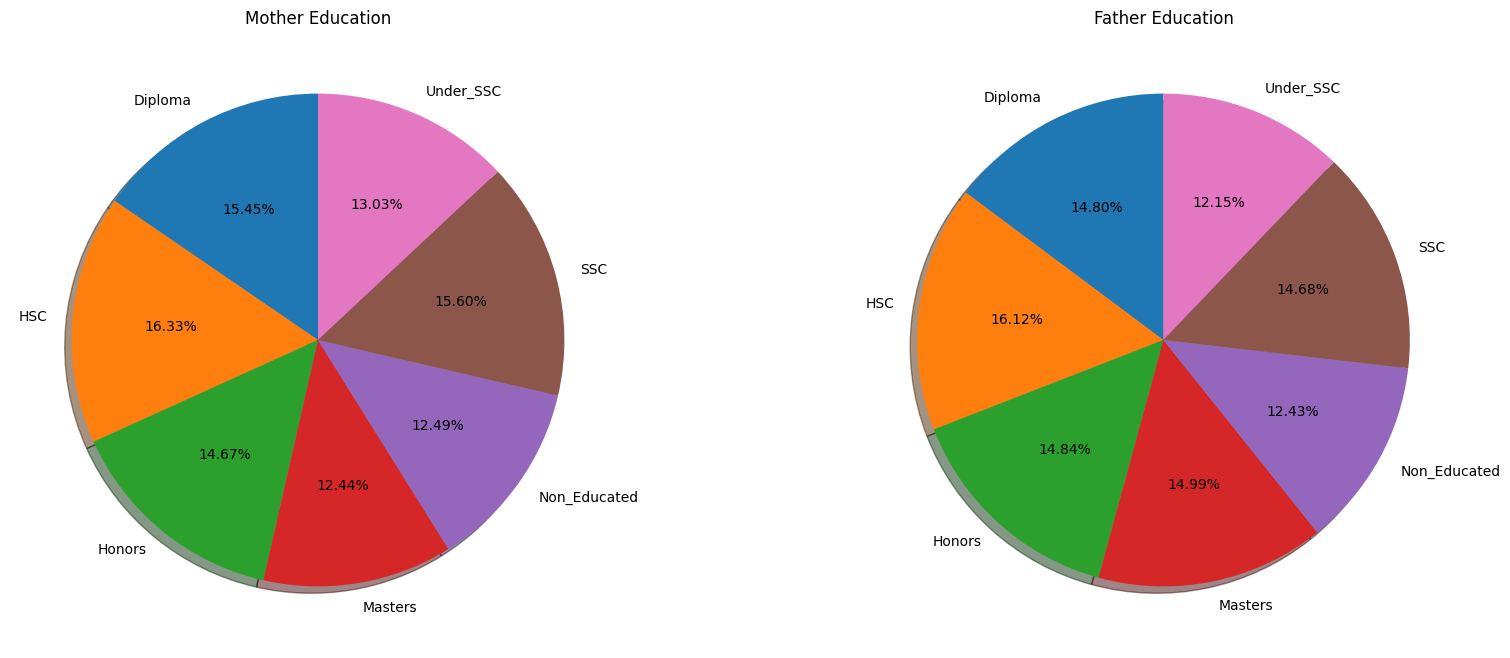

In [32]:
mother_education_proportions = df.groupby('mother_education')['id'].sum()
father_education_proportions = df.groupby('father_education')['id'].sum()
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie(mother_education_proportions, labels=mother_education_proportions.index, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Mother Education')
plt.subplot(1, 2, 2)
plt.pie(father_education_proportions, labels=father_education_proportions.index, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Father Education')
plt.show()

- Most of the students' mothers and fathers have passed SSC
- There is also a significant number of mothers that have passed HSC, Diploma and/or Honors, while most fathers have also passed these exams
- Number of fathers having diploma or higher degree is greater than that of mothers
- Significantly greater number of masters graduates among fathers than among mothers
- Fathers are overall more educated

Mother and Father Jobs

In [33]:
df.mother_job.value_counts()

mother_job
No     4475
Yes    4124
Name: count, dtype: int64

In [34]:
df.father_job.value_counts()

father_job
Yes    4813
No     3786
Name: count, dtype: int64

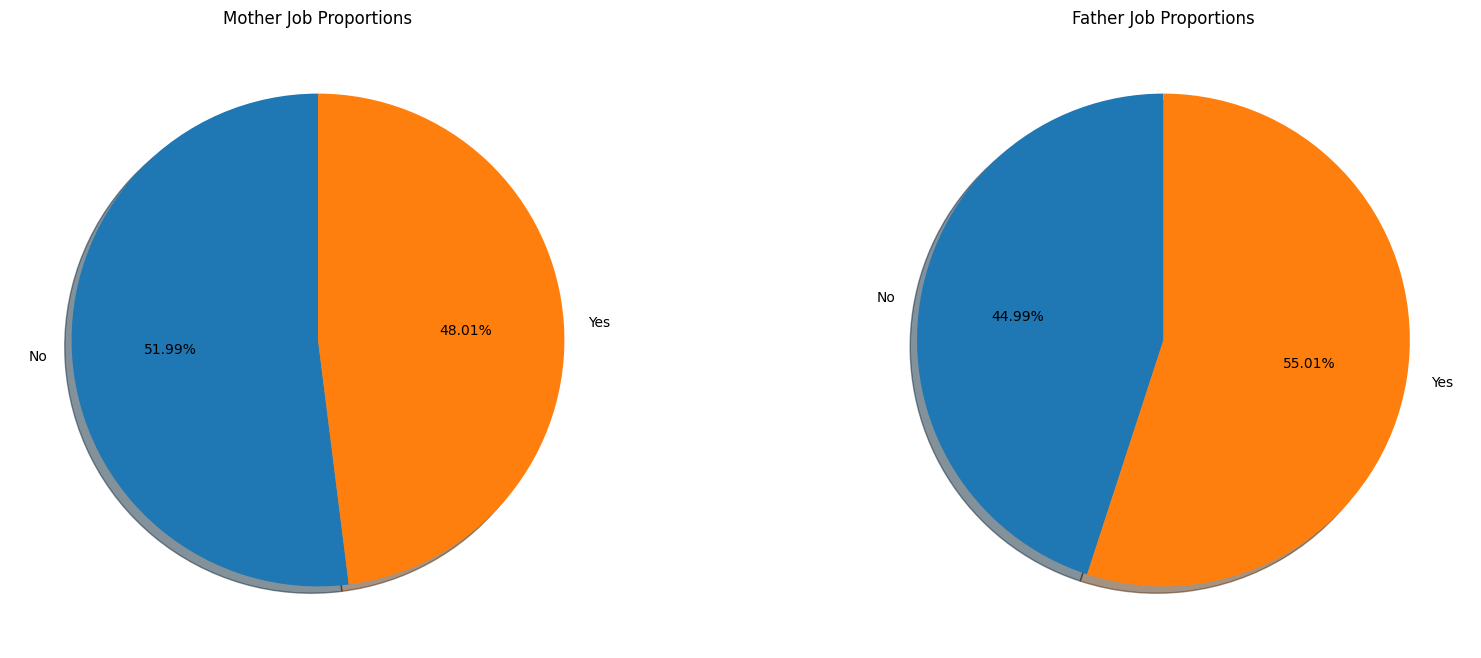

In [35]:
mother_job_proportions = df.groupby('mother_job')['id'].sum()
father_job_proportions = df.groupby('father_job')['id'].sum()
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie(mother_job_proportions, labels=mother_job_proportions.index, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Mother Job Proportions')
plt.subplot(1, 2, 2)
plt.pie(father_job_proportions, labels=father_job_proportions.index, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Father Job Proportions')
plt.show()

`Insights: Fathers are more employed than mothers`

Guardian & Parental Involvement

In [118]:
df['guardian'].value_counts()

guardian
Father    3158
Mother    2758
Other     2683
Name: count, dtype: int64

In [119]:
df['parental_involvement'].value_counts()

parental_involvement
Yes    4552
No     4047
Name: count, dtype: int64

In [123]:
df.groupby('guardian')['parental_involvement'].value_counts()

guardian  parental_involvement
Father    Yes                     1749
          No                      1409
Mother    Yes                     1463
          No                      1295
Other     No                      1343
          Yes                     1340
Name: count, dtype: int64

`Insights: Fathers are more involved in students's education than mothers and other guardians.`

Internet Access

In [124]:
df.internet_access.value_counts()

internet_access
Yes    4667
No     3932
Name: count, dtype: int64

`Insight: More students have internet access`

Tutoring

In [141]:
df.tutoring.value_counts()

tutoring
Yes    4424
No     4175
Name: count, dtype: int64

School Type

In [148]:
df.school_type.value_counts()

school_type
Govt         3149
Semi_Govt    3057
Private      2393
Name: count, dtype: int64

In [150]:
df.groupby('school_type')['attendance'].median()

school_type
Govt         73.0
Private      76.0
Semi_Govt    71.0
Name: attendance, dtype: float64

In [151]:
df.groupby('school_type')['attendance'].mean()

school_type
Govt         73.895840
Private      75.551609
Semi_Govt    72.949951
Name: attendance, dtype: float64

`Insight: Regardless of school type, average attendance is in the 73~75% range. It is worth mentioning that Private schools have the highest average attendance.`

Student Group

In [128]:
df['stu_group'].value_counts()

stu_group
commerce    2677
science     2621
arts        2610
Science      352
Commerce     204
Arts         135
Name: count, dtype: int64

In [130]:
df['stu_group'] = df['stu_group'].apply(lambda x: x.lower())

In [131]:
df['stu_group'].value_counts()

stu_group
science     2973
commerce    2881
arts        2745
Name: count, dtype: int64

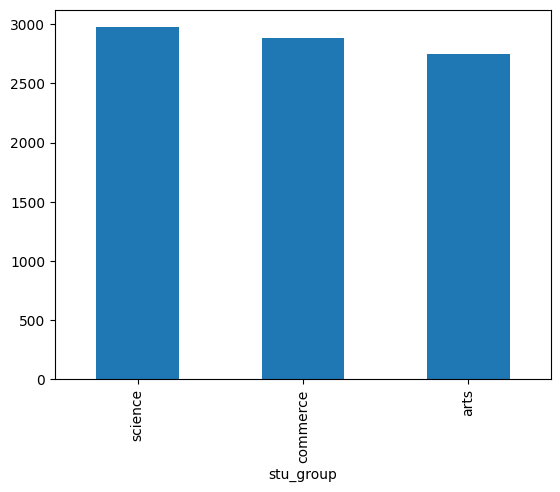

In [138]:
df['stu_group'].value_counts().plot(kind='bar')
plt.show()

`Insight: Most students belong to the Science student group`

Extra Curricular Activities (ECA)

In [152]:
df.extra_curricular_activities.value_counts()

extra_curricular_activities
Yes    4579
No     4020
Name: count, dtype: int64

ECA vs Gender || ECA vs School Type || ECA vs Student Group

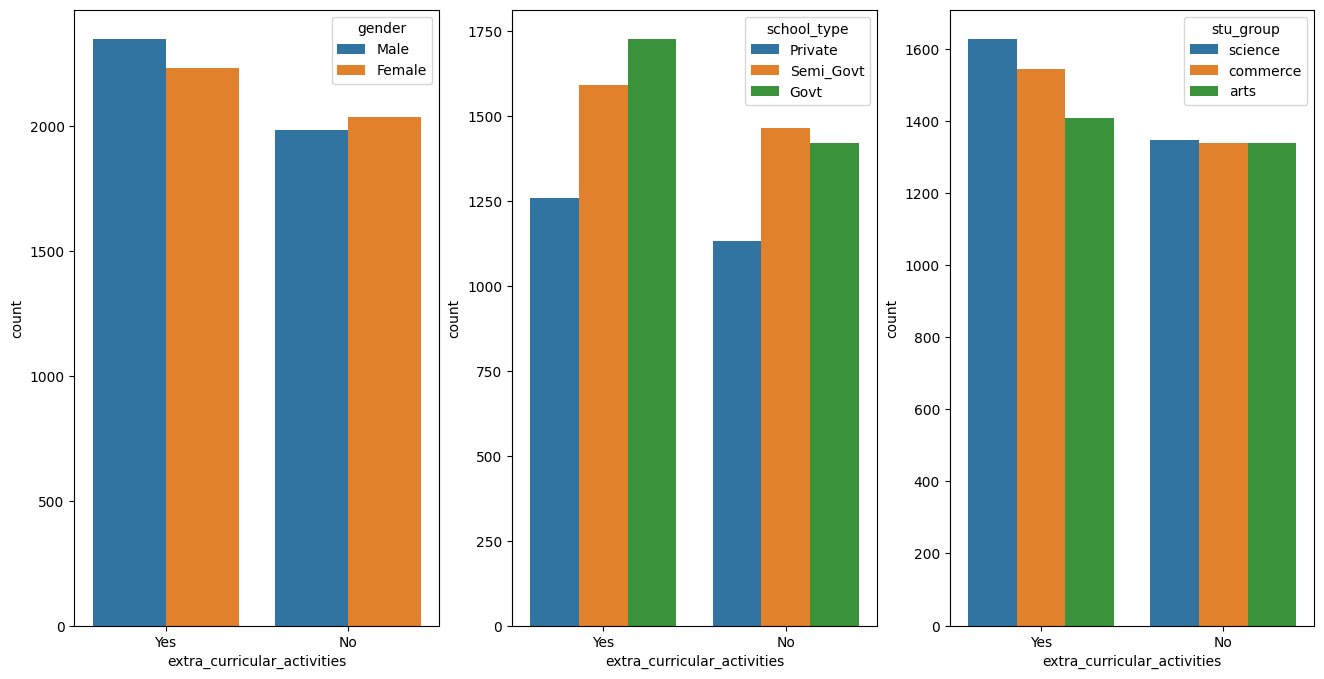

In [132]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
sns.countplot(x='extra_curricular_activities', hue='gender', data=df)

plt.subplot(1, 3, 2)
sns.countplot(x='extra_curricular_activities', hue='school_type', data=df)

plt.subplot(1, 3, 3)
sns.countplot(x='extra_curricular_activities', hue='stu_group', data=df)
plt.show()

```
Insights:
* Males are marginally more engaged in extra-curricular activities
* Government schools students are more engagaged in extra-curricular activities
* Science students are most engagaged in extra-curricular activities, followed by commerce students, and finally arts students.
```

Study time

* Study time

### Numerical Value Analysis

In [81]:
df[df['family_size']==0]

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group,total_marks
63,65,Nilufa Aktar,17,Female,city,0,SSC,Diploma,No,Yes,...,Private,70,Yes,70,70,75,80,78,Arts,373
92,94,Sajjad Hossain limon,16,Male,rural,0,SSC,SSC,No,Yes,...,Private,90,Yes,60,45,90,52,71,Science,318
94,96,Samrat Hossain,15,Male,rural,0,SSC,SSC,Yes,Yes,...,Private,60,Yes,45,80,80,89,92,Science,386
104,106,Asik,16,Male,city,0,SSC,SSC,No,Yes,...,Govt,65,Yes,65,60,42,50,36,Science,253
133,135,Mohammad Ariful Islam,15,Male,rural,0,SSC,SSC,No,No,...,Private,90,Yes,60,90,90,86,71,Science,397
147,149,Md Rasel,16,Male,city,0,SSC,Masters,No,Yes,...,Govt,77,Yes,78,68,78,80,66,Commerce,370
217,219,Sajjad Hossain limon,15,Male,rural,0,SSC,SSC,No,Yes,...,Govt,90,Yes,60,45,90,52,71,Science,318


`Family size is zero for these rows. But the parents have educational backgrounds. That means the family size is at least 3. So I am replacing the family size with 3 for these rows.`

In [82]:
df['family_size'] = df['family_size'].apply(lambda x: 3 if x==0 else x)

In [87]:
df[df['family_size']==11]

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group,total_marks
192,194,Farok Ahmed,17,Male,rural,11,SSC,SSC,No,No,...,Govt,90,Yes,75,95,80,86,86,Science,422
202,204,Masud Rana,16,Male,rural,11,SSC,SSC,Yes,Yes,...,Govt,72,Yes,90,70,85,75,90,Arts,410


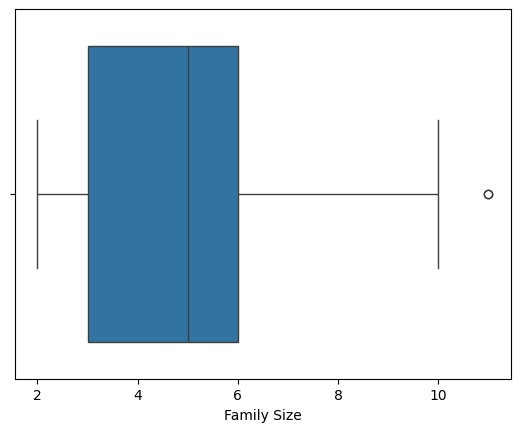

In [83]:
sns.boxplot(x=df.family_size)
plt.xlabel('Family Size')
plt.show()

`Insight: Most students have family size around 3-6. 2 students have family size of 11, which is an outlier. We could discard these 2 rows when training a ML model for better representation the data and prevent noise.`

histogram and scatter plots with other variables for the following:
<!-- * location
* age
* gender
* guardian
* parental involment
* internet access
* study time
* tutoring
* school type
* extra-curricular activities
* student group -->
* age
* study time
* family size
* attendance
* total marks

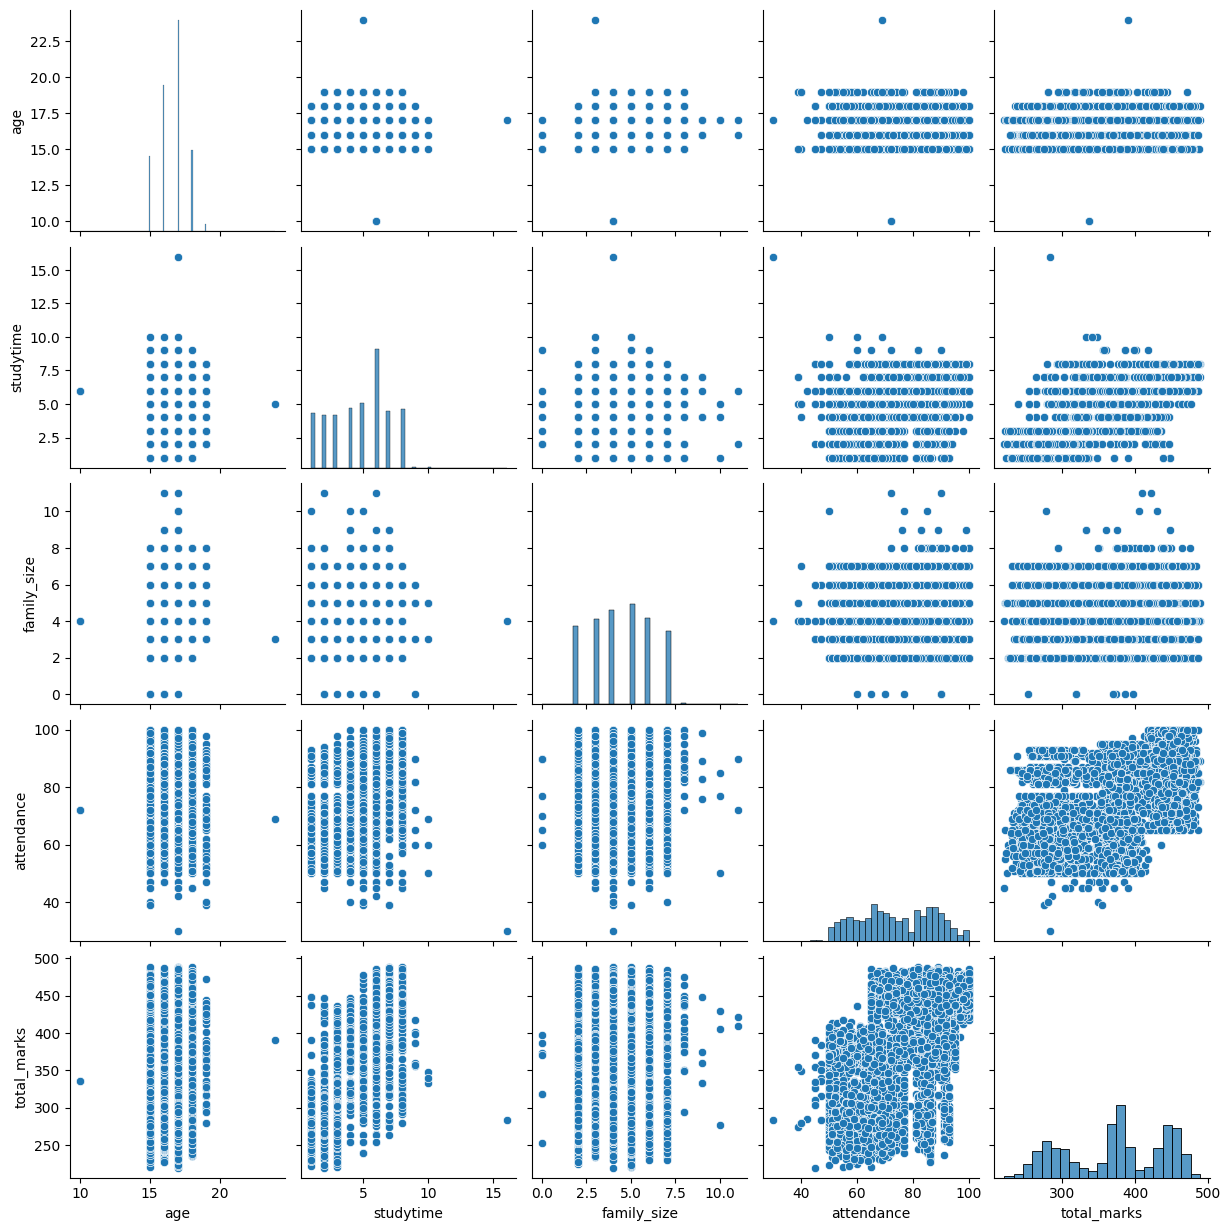

In [142]:
sns.pairplot(df, vars=df[['age', 'studytime', 'family_size', 'attendance', 'total_marks']], kind='scatter', diag_kind='hist')
plt.show()

Heatmap

In [134]:
num_values = ['age', 'studytime', 'family_size', 'attendance', 'total_marks']
correlation = df[num_values].corr()

In [135]:
correlation['studytime']

age            0.020400
studytime      1.000000
family_size   -0.000459
attendance     0.404451
total_marks    0.840402
Name: studytime, dtype: float64

Highly positive correlation between studytime and total_marks. Also positive correlation between attendance and studytime.
### Insights:
- Increased studytime leads to higher marks
- Students with higher attendance percentages typically get higher marks

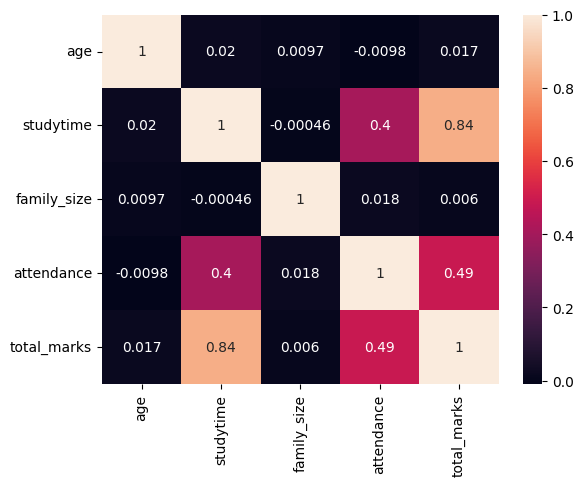

In [136]:
sns.heatmap(correlation, annot=True)
plt.show()

`Insight: We observe that study time and total marks are strongly positively correlated. Also attendance and total marks have high positive correlation. Study time and attendance are also correlated positively, which could mean those students are generally attentive to their studies`

# Numerical and Categorical Analysis

In [113]:
df.groupby('tutoring')['total_marks'].mean()

tutoring
No     368.819401
Yes    372.726492
Name: total_marks, dtype: float64

`Insight: We observe that tutoring provides an insubstantial increase in average performance`

In [108]:
tutoring_yes = df[df['tutoring']=='Yes']['total_marks']
tutoring_no = df[df['tutoring']=='No']['total_marks']

In [122]:
internet_access = df[df['internet_access']=='Yes']['total_marks']
no_internet_access = df[df['internet_access']=='No']['total_marks']

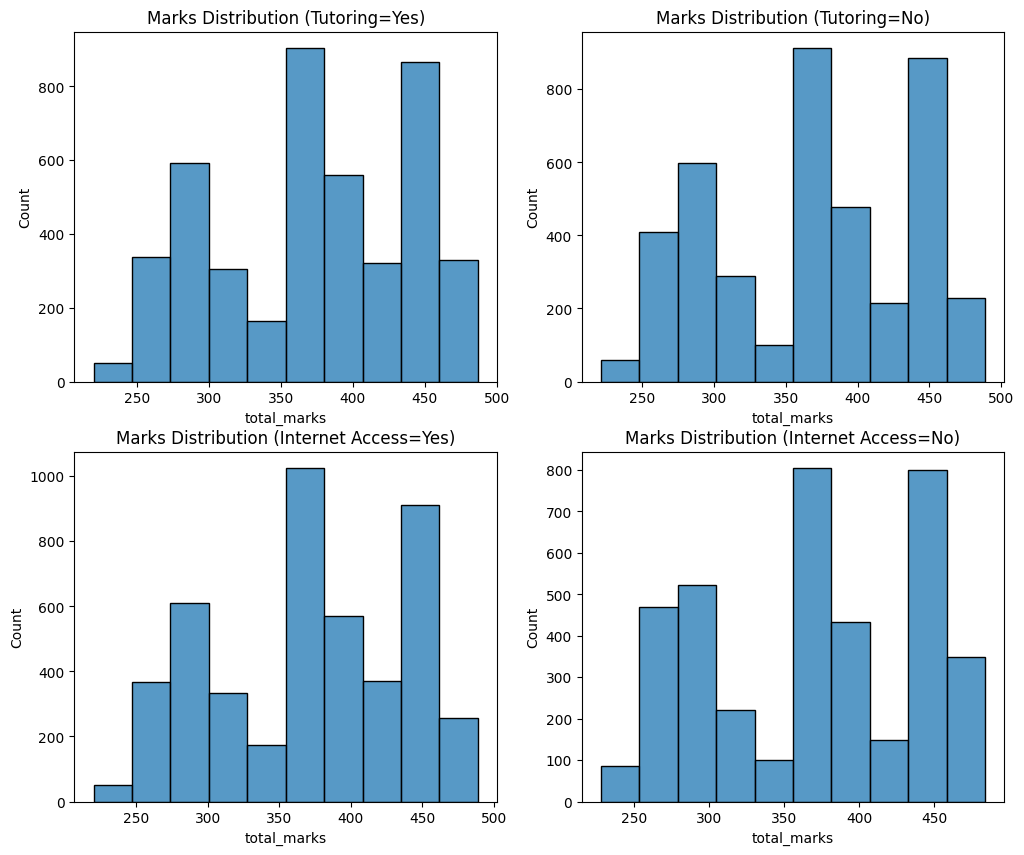

In [125]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.histplot(x=tutoring_yes, kde=False, bins=10)
plt.title('Marks Distribution (Tutoring=Yes)')
plt.subplot(2, 2, 2)
sns.histplot(x=tutoring_no, kde=False, bins=10)
plt.title('Marks Distribution (Tutoring=No)')
plt.subplot(2, 2, 3)
sns.histplot(x=internet_access, kde=False, bins=10)
plt.title('Marks Distribution (Internet Access=Yes)')
plt.subplot(2, 2, 4)
sns.histplot(x=no_internet_access, kde=False, bins=10)
plt.title('Marks Distribution (Internet Access=No)')
plt.show()

`Insight: Although average marks are almost same, tutoring allows more students to obtain higher marks. Having internet access also results in more high scores.`

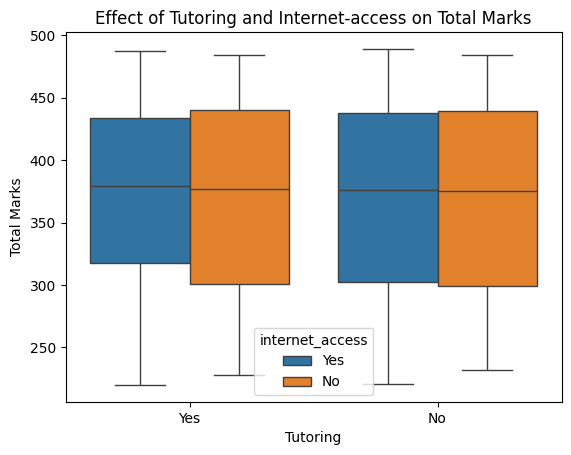

In [102]:
sns.boxplot(x='tutoring', y='total_marks', hue='internet_access', data=df)

plt.title('Effect of Tutoring and Internet-access on Total Marks')
plt.xlabel('Tutoring')
plt.ylabel('Total Marks')

plt.show()